In [3]:
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("GPU available:", torch.cuda.is_available())

GPU available: True


In [26]:
import torch
import torch.nn as nn
import time
import numpy as np

# Define matrix dimensions
M, N, P = 7000, 7000, 7000

# Initialize random matrices
A_cpu = np.random.rand(M, N).astype('f')
B_cpu = np.random.rand(N, P).astype('f')

A_gpu = torch.tensor(A_cpu, device='cuda', dtype=torch.float32)
B_gpu = torch.tensor(B_cpu, device='cuda', dtype=torch.float32)


# CPU matrix multiplication
start = time.time()
C_cpu = np.dot(A_cpu, B_cpu)
end = time.time()
cpu_time = end - start
print(f"CPU time: {cpu_time:.4f} seconds")

# GPU matrix multiplication
start = torch.cuda.Event(enable_timing=True)
end = torch.cuda.Event(enable_timing=True)
start.record()
C_gpu = torch.matmul(A_gpu, B_gpu)
end.record()
torch.cuda.synchronize()
gpu_time = start.elapsed_time(end) / 1000
print(f"GPU time: {gpu_time:.4f} seconds")

# Compare results
print(f"Results match: {np.allclose(C_cpu, C_gpu.cpu().numpy())}")




CPU time: 1.2432 seconds
GPU time: 0.4805 seconds
Results match: True


In [28]:
import matplotlib.pyplot as plt
from tqdm import tqdm

In [30]:
cpu_times, gpu_times = [],[]
for _ in tqdm(range(5000,9000,25)):
    M,N,P = _,_,_
    A_cpu = np.random.rand(M, N).astype('f')
    B_cpu = np.random.rand(N, P).astype('f')
    A_gpu = torch.tensor(A_cpu, device='cuda', dtype=torch.float32)
    B_gpu = torch.tensor(B_cpu, device='cuda', dtype=torch.float32)
    # CPU matrix multiplication
    start = time.time()
    C_cpu = np.dot(A_cpu, B_cpu)
    end = time.time()
    cpu_time = end - start
    
    cpu_times.append(cpu_time)
    # GPU matrix multiplication
    start = torch.cuda.Event(enable_timing=True)
    end = torch.cuda.Event(enable_timing=True)
    start.record()
    C_gpu = torch.matmul(A_gpu, B_gpu)
    end.record()
    torch.cuda.synchronize()
    gpu_time = start.elapsed_time(end) / 1000
    gpu_times.append(gpu_time)
    



 55%|█████▌    | 88/160 [02:46<02:16,  1.89s/it]


KeyboardInterrupt: 

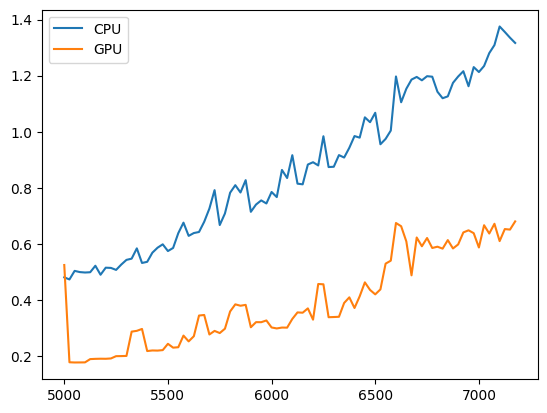

In [34]:
plt.plot(range(5000,9000,25)[:88],cpu_times, label='CPU')
plt.plot(range(5000,9000,25)[:88],gpu_times,label='GPU')
plt.legend()